In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [16]:
# Shape of dataset
df.shape
# Dataset information
df.info()
# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
#Data Cleaning
df.isnull().sum()
#Check Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
#Exploratory Data Analysis (EDA)
#Average Scores
df[['math score','reading score','writing score']].mean()
#Gender-wise Performance
df.groupby('gender')[['math score','reading score','writing score']].mean()
#Test Preparation Impact
df.groupby('test preparation course')[['math score','reading score','writing score']].mean()
#Parental Education Impact
df.groupby('parental level of education')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


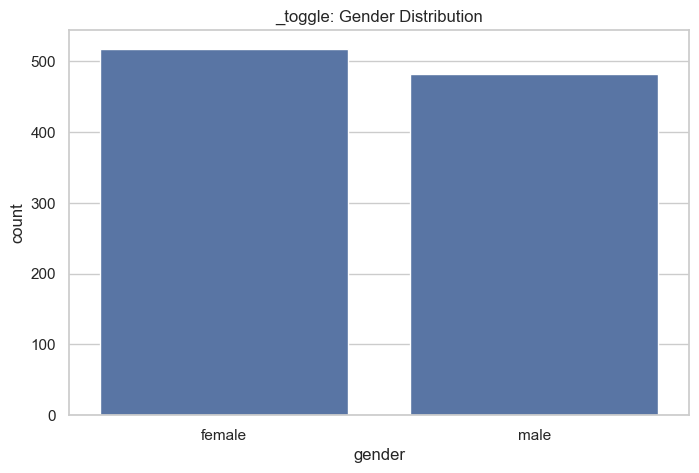

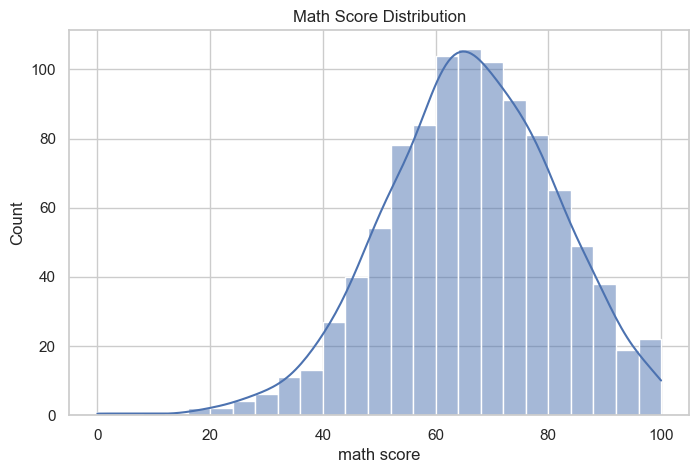

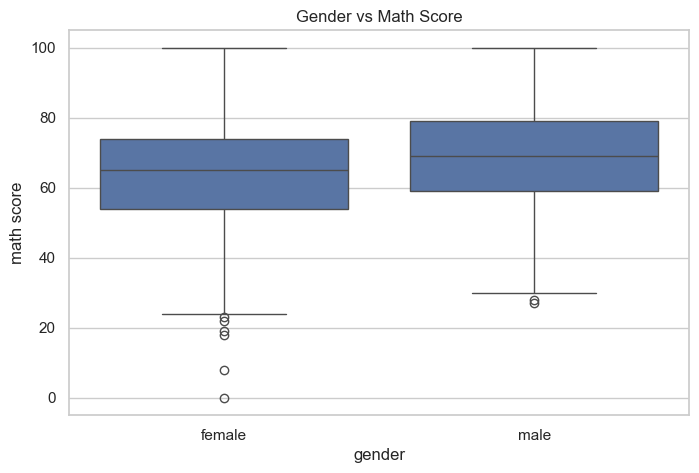

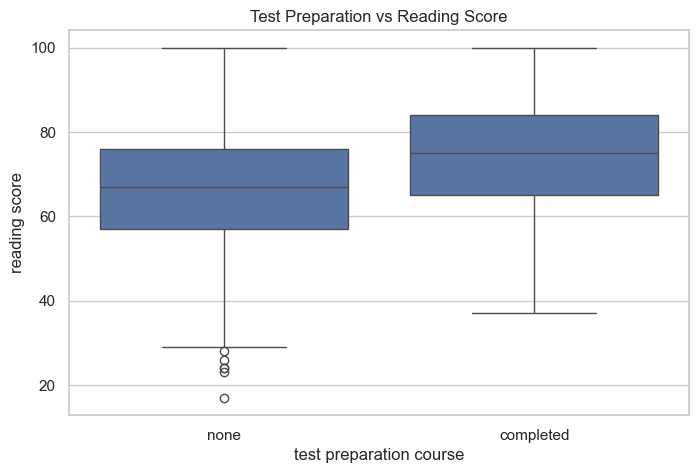

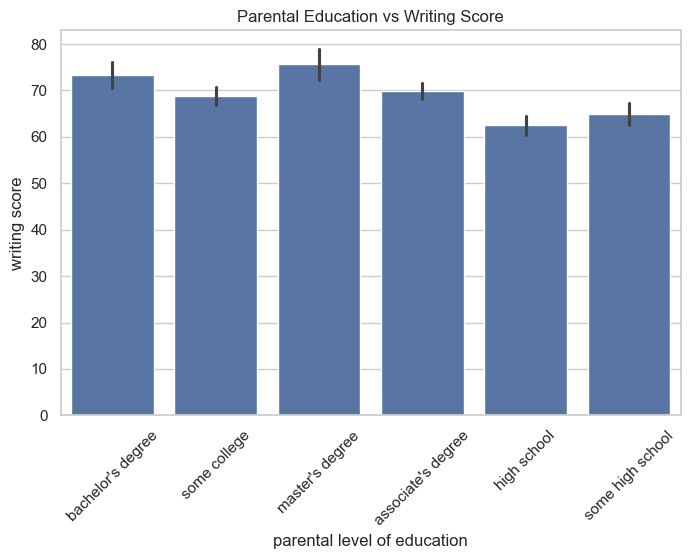

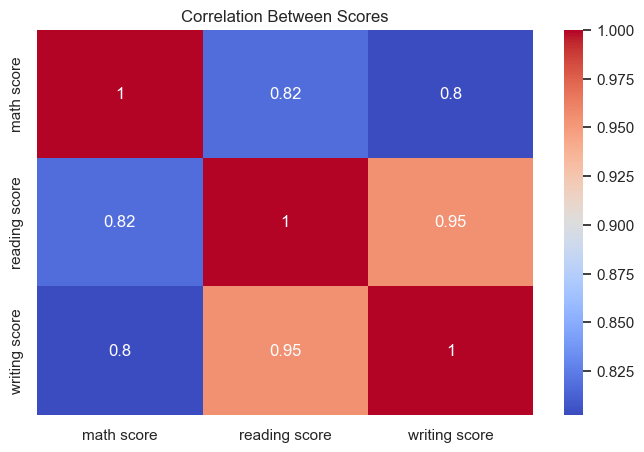

In [13]:
#6 Visualizations
# Visualization 1: Gender Distribution
sns.countplot(x='gender', data=df)
plt.title("_toggle: Gender Distribution")
plt.show()

# Visualization 2: Math Score Distribution
sns.histplot(df['math score'], kde=True)
plt.title("Math Score Distribution")
plt.show()

# Visualization 3: Gender vs Math Score
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Gender vs Math Score")
plt.show()

# Visualization 4: Test Preparation vs Reading Score
sns.boxplot(x='test preparation course', y='reading score', data=df)
plt.title("Test Preparation vs Reading Score")
plt.show()

# Visualization 5: Parental Education vs Writing Score
sns.barplot(x='parental level of education', y='writing score', data=df)
plt.xticks(rotation=45)
plt.title("Parental Education vs Writing Score")
plt.show()

# Visualization 6: Correlation Heatmap
sns.heatmap(df[['math score','reading score','writing score']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()